# What makes a Data Scientist?

## Setup

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

%matplotlib inline
%load_ext lab_black

## Business/Data Understanding

What are they attributes of a Data Scientist? Do they differ from those of other coders. Can we predict who works as a Data Scientist based on other attributes in this dataset?

### General information

In [2]:
questions = pd.read_csv("data/survey_results_schema.csv")

questions

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [3]:
responses = pd.read_csv("data/survey_results_public.csv")

responses.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,88883.000000,88331,88883,88883,86842,87181,88751,87014,86390,75614,84260,71791,81335,87938,87634,74331,72847,70988,61159,61157,61232,80555,79854,67155,71344,79371,77877,71392,71392,5.594500e+04,63268,5.582300e+04,64503.000000,68914,68141,70284,70055,71779,70390,49790.000000,62668,61108,62029,87569,84088,76026,69147,80714,77443,65022,62944,59586,64511,87317,87851,85366,48175,60165,86269,87141,86663,84437,87305,80486,83877,88263,88086,87816,86344,68378,87828,74692,88066,87841,88131,85855,69560,79210.000000,85406,83607,76147,76668,83059,86984,87081
unique,NaN,5,2,4,3,6,179,3,9,12,492,9,13141,52,69,52,5,5,4,3,4,3,6,63,2,175,6,143,144,NaN,3,NaN,NaN,3,129,7,3,5,3,NaN,4,4,3,20098,27259,3478,3923,8731,10795,2142,2312,2783,5565,7716,4,21,5,5,2,4,3,14,3,5,13,6,63,5,5,4,3,6,3,3,6,6,15,NaN,7,2,7,196,2,3,3
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taught yourself a new language, framework, or tool without taking a formal course",20 to 99 employees,"Developer, full-stack",5,15,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Interview with people in peer roles;Interview with people in senior / management roles,No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development",I was preparing for a job search,USD,United States dollar,NaN,Yearly,NaN,NaN,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns",Being tasked with non-development work;Distracting work environment;Meetings,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",NaN,"Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,HTML/CSS;JavaScript;PHP;SQL,Python,MySQL,PostgreSQL,Windows,Linux,jQuery,React.js,Node.js,Node.js,Visual Studio Code,Windows,I do not use containers,Not at all,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Reddit,In real life (in person),Username,I don't remember,Daily or almost daily,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,NaN,65679,71257,32295,41527,64440,20949,65816,39134,47214,6699,15199,8433,7047,8681,795

In [4]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

Check which columns allow multiple answers

In [5]:
multipleAnswers = (
    responses.apply(lambda x: x.astype(str).str.contains(";")).describe().T
)

# multipleAnswers.T
# multipleAnswers.info()

multipleAnswers[
    (multipleAnswers["unique"] == 2) | (multipleAnswers["top"] == True)
].T.columns

Index(['EduOther', 'DevType', 'LastInt', 'JobFactors', 'WorkPlan',
       'WorkChallenge', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'Containers', 'SOVisitTo',
       'SONewContent', 'Gender', 'Sexuality', 'Ethnicity'],
      dtype='object')

We now know what the questions were and broadly what kind of data we have in the responses.

### Finding the Data Scientists

How do we find people who identify as Data Scientists so we have a target variable to evaluate against. The "Developer type" responses seem to hold the answer...

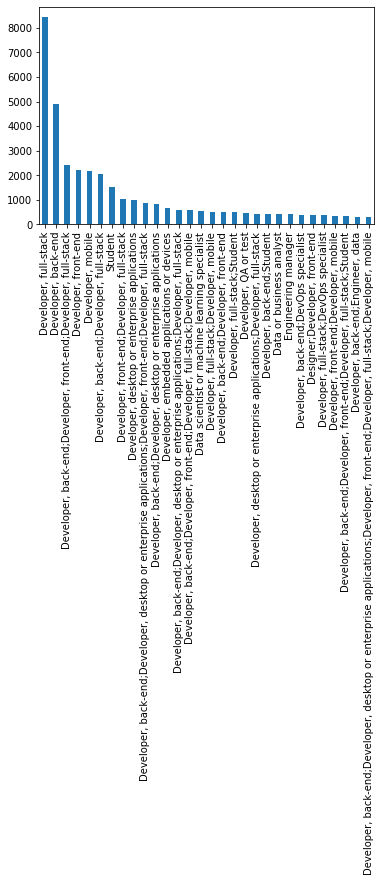

In [6]:
responses.DevType.value_counts()[:30].plot(kind="bar")

In [7]:
devTypeRoles = ";".join(role for role in responses.DevType.dropna()).split(";")
devTypeRoles[:20]

['Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Designer',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, full-stack',
 'Academic researcher',
 'Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Developer, mobile',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Engineer, data',
 'Designer',
 'Developer, front-end',
 'Developer, back-end',
 'Engineer, site reliability',
 'Database administrator']

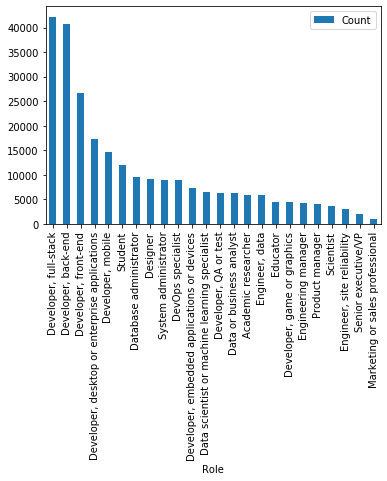

In [8]:
pd.DataFrame(
    [[x, devTypeRoles.count(x)] for x in set(devTypeRoles)], columns=["Role", "Count"]
).set_index(["Role"]).sort_values(by="Count", ascending=False).plot(kind="bar")

Each person may have selected many developer types. For our purposes anyone who selects "Data scientist or machine learning specialist" qualifies - regardless of what else they may select.

In [9]:
print(
    "There are {0} Data Scientists out of {1} respondents".format(
        len(
            responses[
                responses.DevType.str.contains(
                    "Data scientist or machine learning specialist"
                ).fillna(False)
            ]
        ),
        len(responses),
    )
)

There are 6460 Data Scientists out of 88883 respondents


## Data Preparation

In [10]:
df = responses.copy()
df.shape

(88883, 85)

### Labelling Data Scientists

Replace the DevType field with a binary label: 1=Data Scientist, 0=Not Data Scientist

In [11]:
df["Data Scientist"] = (
    df.DevType.str.contains("Data scientist or machine learning specialist")
    .fillna(False)
    .astype(int)
)
df.dropna(subset=["DevType"], axis=0, inplace=True)

df["Data Scientist"].value_counts()

0    74875
1     6460
Name: Data Scientist, dtype: int64

In [12]:
# del df['DevType']
df = df.drop(["DevType"], axis=1)

df.shape

(81335, 85)

### Outliers

Some of the responses don't really tell us anything of interest so we can remove them from the analysis. Firstly, I will generalise that we aren't interested in questions on Stackoverflow or the survey itself. The rationale being that this will broaden the applicability of the model.

In [13]:
outlierFields = [
    "Respondent",  # Unique ID no-predictive use
    "CompTotal",  # Salary in local currency so not all on same scale. Use ConvertedComp instead
    "CodeRevHrs",  # Almost half responses have NaN here so it limits the dataset size when removing missing values
    "SOVisit1st",  # About Stackoverflow/survey
    "SOVisitFreq",  # About Stackoverflow/survey
    "SOVisitTo",  # About Stackoverflow/survey
    "SOFindAnswer",  # About Stackoverflow/survey
    "SOTimeSaved",  # About Stackoverflow/survey
    "SOHowMuchTime",  # About Stackoverflow/survey
    "SOAccount",  # About Stackoverflow/survey
    "SOPartFreq",  # About Stackoverflow/survey
    "SOJobs",  # About Stackoverflow/survey
    "EntTeams",  # About Stackoverflow/survey
    "SOComm",  # About Stackoverflow/survey
    "WelcomeChange",  # About Stackoverflow/survey
    "SONewContent",  # About Stackoverflow/survey
    "SurveyLength",  # About Stackoverflow/survey
    "SurveyEase",  # About Stackoverflow/survey
]

df = df.drop(outlierFields, axis=1)

df.shape

(81335, 67)

### Feature extraction

Responses can be divided into 3 groups:
1. Single-value categorical values
2. Multi-value categorical values
3. Numeric values

The first two groups need converting into numeric values to use in our ML model

In [15]:
for var in df.columns:
    if df[var].dtype == np.object_:
        # memory errors so just use the single values for now
        if df[var].str.contains(";").any():
            df = df.drop([var], axis=1)
        else:
            df = pd.concat(
                [
                    df.drop(var, axis=1),
                    pd.get_dummies(
                        df[var], prefix=var, prefix_sep="_", drop_first=True
                    ),
                ],
                axis=1,
            )

# df.describe()
df.shape

(81335, 755)

### Missing values

Remove/Impute/Work around

In [16]:
df.dropna(axis=0, inplace=True)
# df.dropna(axis=1, how="all", inplace=True)
# df = df.apply(lambda x: x.fillna(x.mean()), axis=0)
df.shape

(52426, 755)

### Feature scaling

Now that we have a list of numeric features we can scale them all to give an equal weighting in our model

In [17]:
scaler = MinMaxScaler()
# StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.shape

C:\Users\adeacon\AppData\Local\Continuum\miniconda3\envs\stack2019\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(52426, 755)

### Feature selection

It's still quite a long list of features. Maybe too many for the size of dataset.

In [18]:
df.columns

Index(['ConvertedComp', 'WorkWeekHrs', 'Age', 'Data Scientist',
       'MainBranch_I am a student who is learning to code',
       'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work',
       'MainBranch_I code primarily as a hobby',
       'MainBranch_I used to be a developer by profession, but no longer am',
       'Hobbyist_Yes', 'OpenSourcer_Less than once per year',
       ...
       'SocialMedia_YouTube', 'SocialMedia_Youku Tudou 优酷',
       'Extraversion_Neither', 'Extraversion_Online', 'ScreenName_Login',
       'ScreenName_Screen Name', 'ScreenName_UserID', 'ScreenName_Username',
       'Trans_Yes', 'Dependents_Yes'],
      dtype='object', length=755)

In [19]:
# kbest = 100

# y = df['Data Scientist']
# X = df.drop(['Data Scientist'], axis=1)

# selector = SelectKBest(f_classif, k=kbest)
# selector.fit(X, y)

# mask = selector.get_support() #list of booleans
# selected_features = ["Data Scientist"] # The list of your K best features

# for bool, feature in zip(mask, X.columns):
#     if bool:
#         selected_features.append(feature)

# len(selected_features)

# df = df[selected_features]

df.describe()

,ConvertedComp,WorkWeekHrs,Age,Data Scientist,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,"MainBranch_I used to be a developer by profession, but no longer am",Hobbyist_Yes,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,"OpenSource_OSS is, on average, of LOWER quality than proprietary / closed source software",OpenSource_The quality of OSS and closed source software is about the same,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed","Employment_Not employed, but looking for work",Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,...,CurrencyDesc_Rwandan franc,CurrencyDesc_SDR (Special Drawing Right),CurrencyDesc_Samoan tala,CurrencyDesc_Saudi Arabian riyal,CurrencyDesc_Serbian dinar,CurrencyDesc_Seychellois rupee,CurrencyDesc_Sierra Leonean leone,CurrencyDesc_Singapore dollar,CurrencyDesc_Somali shilling,CurrencyDesc_South African rand,CurrencyDesc_South Korean won,CurrencyDesc_Sri Lankan rupee,CurrencyDesc_Sudanese pound,CurrencyDesc_Swazi lilangeni,CurrencyDesc_Swedish krona,CurrencyDesc_Swiss franc,CurrencyDesc_Syrian pound,CurrencyDesc_Tajikistani somoni,CurrencyDesc_Tanzanian shilling,CurrencyDesc_Thai baht,CurrencyDesc_Trinidad and Tobago dollar,CurrencyDesc_Tunisian dinar,CurrencyDesc_Turkish lira,CurrencyDesc_Turkmen manat,CurrencyDesc_Ugandan shilling,CurrencyDesc_Ukrainian hryvnia,CurrencyDesc_United Arab Emirates dirham,CurrencyDesc_United States dollar,CurrencyDesc_Uruguayan peso,CurrencyDesc_Uzbekistani som,CurrencyDesc_Vanuatu vatu,CurrencyDesc_Venezuelan bolivar,CurrencyDesc_Vietnamese dong,CurrencyDesc_West African CFA franc,CurrencyDesc_Yemeni rial,CurrencyDesc_Zambian kwacha,CurrencyDesc_e Cook Islands dollar,CurrencyDesc_e Faroese krona,CompFreq_Weekly,CompFreq_Yearly,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time",WorkLoc_Office,"WorkLoc_Other place, such as a coworking space or cafe",ImpSyn_A little below average,ImpSyn_Average,ImpSyn_Far above average,ImpSyn_Far below average,"CodeRev_Yes, because I see value in code review","CodeRev_Yes, because I was told to do so","UnitTests_No, but I think we should","UnitTests_Yes, it's not part 

## Modelling

* Split features from target variable
* Split testing and training sets
* Model selection - Naive Bayes, Ada Boost, Random Forest, XG Boost
* Tune Hyperparameters?

### Split features from target variable

In [20]:
labels = df["Data Scientist"]
features = df.drop(["Data Scientist"], axis=1)
features.shape, labels.shape

((52426, 754), (52426,))

### Test/train split

In [21]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.1, random_state=42
)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((47183, 754), (5243, 754), (47183,), (5243,))

### Naive Bayes model

In [22]:
all_metrics = {}


def metrics_data(title, labels, predictions):
    """
    INPUT:
        title - Display title for classification algorithm
        labels - Actual values for target variable
        predictions - Predicted values for target variable
        
    OUTPUT:
        metrics - Dictionary of classification metrics for given title
    """
    metrics = {
        title: {
            "accuracy": accuracy_score(labels, predictions),
            "precision": precision_score(labels, predictions),
            "recall": recall_score(labels, predictions),
            "f1-score": f1_score(labels, predictions),
        }
    }
    print(metrics)
    return metrics


nb_clf = GaussianNB()

nb_clf.fit(features_train, labels_train)

nb_pred = nb_clf.predict(features_test)

all_metrics.update(metrics_data("Naive Bayes", labels_test, nb_pred))

{'Naive Bayes': {'accuracy': 0.09536524890329964, 'precision': 0.0793002915451895, 'recall': 0.9855072463768116, 'f1-score': 0.14678899082568805}}


### Ada Boost model

In [23]:
ab_clf = AdaBoostClassifier()

ab_clf.fit(features_train, labels_train)

ab_pred = ab_clf.predict(features_test)

all_metrics.update(metrics_data("Ada Boost", labels_test, ab_pred))

{'Ada Boost': {'accuracy': 0.9235170703795537, 'precision': 0.5866666666666667, 'recall': 0.10628019323671498, 'f1-score': 0.17995910020449898}}


### Gradient Boost model

In [24]:
gb_clf = GradientBoostingClassifier()

gb_clf.fit(features_train, labels_train)

gb_pred = gb_clf.predict(features_test)

all_metrics.update(metrics_data("Gradient Boost", labels_test, gb_pred))

{'Gradient Boost': {'accuracy': 0.9237078008773603, 'precision': 0.6521739130434783, 'recall': 0.07246376811594203, 'f1-score': 0.13043478260869565}}


## Evaluation

Compare the different models/results to determine the best performing one

In [25]:
pd.DataFrame(all_metrics).T

,accuracy,f1-score,precision,recall
Naive Bayes,0.095365,0.146789,0.079300,0.985507
Ada Boost,0.923517,0.179959,0.586667,0.106280
Gradient Boost,0.923708,0.130435,0.652174,0.072464


In [26]:
# Naive Bayes only does well on Recall whilst Accuracy and Precision are very poor
# Ada Boost has the least worst F1 score and the Accuracy is promising
# Gradient Boost does well on Accuracy and ok on Precision but worst on Recall and F1

## Deployment

* Summarise findings
* Next steps

In [27]:
# None of the models looking a very reliable predictor so far! :-(